In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime

Using TensorFlow backend.


In [3]:
data = pd.read_csv("Price.csv")

In [4]:
high_prices=data['High'].values
low_prices=data['Low'].values
mid_prices=(high_prices+low_prices)/2

# Create Window

In [5]:
seq_len=50 #최근 50일데이터보고 미래예측
sequence_length=seq_len+1

result=[]
for index in range(len(mid_prices)-sequence_length):
    result.append(mid_prices[index:index+sequence_length])

# Normalize Data

In [6]:
normalized_data=[]
for window in result:
    normalized_window=[((float(p)/float(window[0]))-1)for p in window]
    normalized_data.append(normalized_window)
    
result=np.array(normalized_data)

#split train and test data
row = int(round(result.shape[0]*0.9))
train=result[:row,:]
np.random.shuffle(train)

x_train=train[:,:-1]
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train=train[:,-1]

x_test=result[row:,:-1]
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
y_test=result[row:,-1]

x_train.shape, x_test.shape

((1516, 50, 1), (169, 50, 1))

# Build a Model

In [7]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))
model.add(LSTM(64, return_sequences=False)) #조정하며 성능 테스트
model.add(Dense(1,activation='linear')) #다음날 하루의 데이터 예측
model.compile(loss='mse', optimizer='rmsprop') #min squared error for loss
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


# Training

In [8]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=10, epochs=20)

Train on 1516 samples, validate on 169 samples
Epoch 1/20
1516/1516 [==============================] - 6s 4ms/step - loss: 0.0086 - val_loss: 0.0013
Epoch 2/20
1516/1516 [==============================] - 5s 4ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 3/20
1516/1516 [==============================] - 6s 4ms/step - loss: 0.0030 - val_loss: 6.0081e-04
Epoch 4/20
1516/1516 [==============================] - 5s 4ms/step - loss: 0.0022 - val_loss: 5.4199e-04
Epoch 5/20
1516/1516 [==============================] - 6s 4ms/step - loss: 0.0017 - val_loss: 4.0751e-04
Epoch 6/20
1516/1516 [==============================] - 6s 4ms/step - loss: 0.0015 - val_loss: 3.9657e-04
Epoch 7/20
1516/1516 [==============================] - 6s 4ms/step - loss: 0.0014 - val_loss: 3.6846e-04
Epoch 8/20
1516/1516 [==============================] - 6s 4ms/step - loss: 0.0012 - val_loss: 3.5935e-04
Epoch 9/20
1516/1516 [==============================] - 6s 4ms/step - loss: 0.0012 - val_loss: 3.4607e-04
Epoch 1

# Prediction

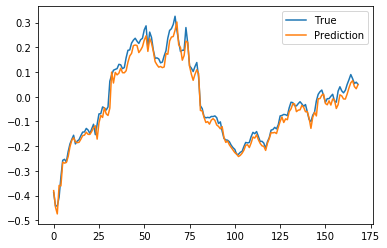

In [25]:
pred = model.predict(x_test)

fig=plt.figure(facecolor='white')
ax=fig.add_subplot(111)
ax.plot(y_test,label='True')
ax.plot(pred,label='Prediction')
ax.legend()
plt.show()